In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.pyplot as plt
import re

### Merging 12 months of sales into a single csv file

In [3]:
df = pd.read_csv('C:\Projetos\Treinos_Pandas\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_January_2019.csv')

In [4]:
files = [file for file in os.listdir('.\Treinos_Pandas\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]

df_total = pd.DataFrame()

for file in files:
    df = pd.read_csv(".\Treinos_Pandas\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\\" + file)
    df_total = pd.concat([df_total, df])
    
df_total.to_csv('.\Treinos_Pandas\Pandas-Data-Science-Tasks-master\SalesAnalysis\df_total.csv', index=False)

In [52]:
df = pd.read_csv('.\Treinos_Pandas\Pandas-Data-Science-Tasks-master\SalesAnalysis\df_total.csv')

In [53]:
#add month column
df['Month'] = df['Order Date'].str[0:2] # selects months from the Order Date

In [54]:
# clean data / drop NAN Values
df = df.dropna()

In [55]:
df = df[df['Month'] != 'Or'] # remove row where 'Or' is present in Column 'Month'
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [56]:
df['Month'] = df['Month'].astype('int32')

In [57]:
#df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
#df['Price Each'] = df['Price Each'].astype('float')
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [58]:
# Coluna de vendas, multiplicando a quantidade de produtos vendidos pelo seu preço
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [59]:
# ordenar as colunas
cols = list(df.columns.values)
df = df[cols[0:4] + [cols[-1]] + [cols[-2]] + cols[4:6]]
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,4,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


### What was the best month for sales? How much was earned the month?

In [45]:
results = df.groupby(['Month']).sum() #.sort_values('Sales', ascending = False)
results['Sales'] = results['Sales'] / 1000

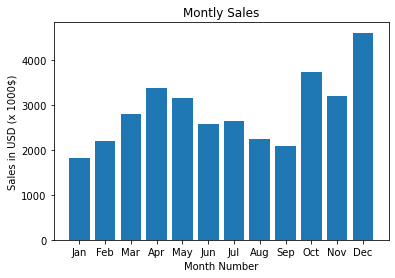

In [46]:
# Converter os numeros dos meses em nomes dos meses, selecionar somente as primeiras 3 letras do mês

import datetime
monthint = list(range(1,13))
monthlist = []

for X in monthint:
    months = datetime.date(1900, X , 1).strftime('%B')
    monthlist.append(months[0:3])

plt.bar(monthlist, results['Sales'])

plt.xticks(monthlist, rotation = 0)
plt.ylabel('Sales in USD (x 1000$)')
plt.xlabel("Month Number")
plt.title("Montly Sales")

plt.show()

### What city had the highest number of sales?

In [47]:
# Criar uma coluna nova, separando o nome da cidade que está entre virgulas e escolhemos o valor de indice 1 para gravar na nova coluna

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]


#df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])

df['City'] = df['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))

In [48]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,City,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,Dallas TX,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,Boston MA,"682 Chestnut St, Boston, MA 02215",99.99,4


In [49]:
city_sales = df.groupby(['City']).sum()
city_sales

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta GA,16602,2.779908e+06,2.795499e+06,104794
Austin TX,11153,1.809874e+06,1.819582e+06,69829
Boston MA,22528,3.637410e+06,3.661642e+06,141112
Dallas TX,16730,2.752628e+06,2.767975e+06,104620
Los Angeles CA,33289,5.421435e+06,5.452571e+06,208325
New York City NY,27932,4.635371e+06,4.664317e+06,175741
Portland ME,2750,4.471893e+05,4.497583e+05,17144
Portland OR,11303,1.860558e+06,1.870732e+06,70621
San Francisco CA,50239,8.211462e+06,8.262204e+06,315520


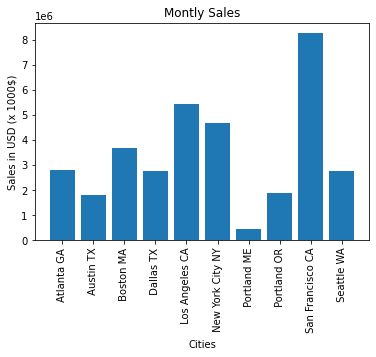

In [50]:
cities = [city for city, df in df.groupby('City')]

plt.bar(cities, city_sales['Sales'])

plt.xticks(cities, rotation = 90)
plt.ylabel('Sales in USD (x 1000$)')
plt.xlabel("Cities")
plt.title("Montly Sales")

plt.show()

### What time should we display advertisements to maximize likelihood of costumer's buying product?

In [60]:
#Converte o formato da "Order Data" de string para formato datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [65]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,4,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",22,30


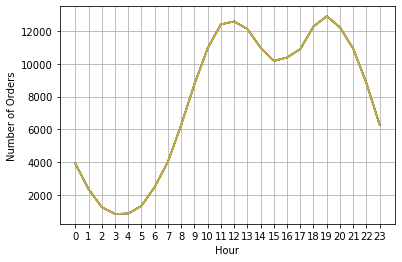

In [78]:
hours = [hour for hour, df in df.groupby('Hour')]

plt.plot(hours, df.groupby(['Hour']).count())

plt.xticks(hours, rotation = 0)
plt.grid()
plt.ylabel('Number of Orders')
plt.xlabel("Hour")

plt.show()

### What products are most often sold together?

In [87]:
df2 = df[df["Order ID"].duplicated(keep = False)]

df2["Grouped"] = df2.groupby('Order ID')['Product']. transform(lambda x: ','.join(x))

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [89]:
df2 = df2[['Order ID', 'Grouped']].drop_duplicates()
df2.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [96]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for k, v in count.most_common(10):
    print(k, v)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most? Why do you think it sold the most?

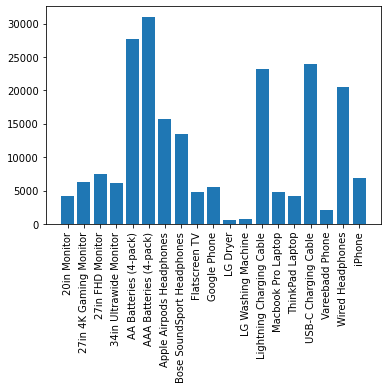

In [98]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)

plt.xticks(products, rotation = 90)
plt.show()

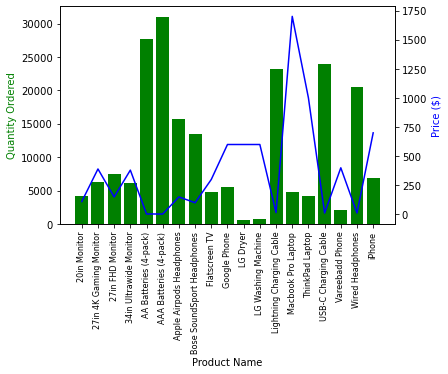

In [103]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation = 90, size = 8)

plt.show()